# Data Cleaning

### Project Overview

__Business Problem__

This project uses regression analysis to solve the problem of disposable buildings, or usage of buildings for a short life cycle. Building longevity, defined as the years of service of a building, has gone down over history resulting in the shortest building lifespans ever before in history. This creates an excess of physical waste being sent to landfills, and also reduces the potential return on investment for building owners. Most buildings generate revenue, so the longer they are in service, the greater return for the owner.

__Customers__

The potential users who would benefit from this analysis include long-term building owners such as real estate corporations and government agencies. Companies such as JLL, CBRE, and the Related Company own portfolios of hundreds or thousands of buildings. Government agencies such as HUD, the US Army Corps of Engineers, and Navy Facilities Command also own and maintain large portfolios. These customers are constantly evaluating whether to build new, renovate existing properties, or some combination of the th two.  Predicting building life span would benefit these customers by giving them a baseline understanding of what is the typical lifespan of a building within the set of buildings that are demolished.


__Analysis__

This analysis studies only demolished buildings. Future study could include study of existing buildings as well. Since some buildings are never demolished, or last far longer than typical buildings, these have different properties that can't be understood from studying only demolished buildings. However, a study of demolished buildings can reveal what factors may have influenced demolition and how this may be avoided for owners wishing to use their buildings for a longer lifespan.



__Data__

Data was obtained from two sources: PLUTO, or Primary Land Use Tax Output, and NYC Open Data  Department of Buildings (DOB) Permit Issuance.

Pluto is a a system for keeping track of New York City land use data by lot. PLUTO compiles data from multiple sources including the NYC Department of City Planning, Department of Finance, Landmarks Preservation Commission, and the Department of Information, Telecommunications and Technology.

The permits data is being used to filter out the PLUTO data. The only columns from the permits data that are needed for this purpose are the columns used to merge (borough, block, and lot) as well as 'Bldg Type' (used to filter to commercial buildings), 'Residential' to check filtering, 'Permit Type' and 'Issuance Date' which describes when the demolition began. All other columns from this dataset are dropped.

__Data Cleaning__

The following columns will be dropped for too many missing values:
- masdate
- polidate

The following columns will be dropped beause they are not relevant:
- zmcode, a code which identifies a tax lot on the border of two zoning maps.  
- condono, the condominium number.
- owner name
- ct2010, the 2010 census tract in which the tax lot is located.
- tract2010, The 2010 census tract in which the tax lot is located. 
- cb2010, the 2010 census block in which the tax lot is located.
- firecomp, the fire company that services the tax lot.
- sanborn, the Sanborn Map Company map number associated with the tax block and lot.
- sanitsub, the subsection of the sanitation district that services the tax lot.
- address
- areasource, a code indicating the methodology used to determine the tax lot's TOTAL BUILDING FLOOR AREA (BldgArea) 
- zonemap, Department of City Planning Georeferenced NYC Zoning Maps 
- taxmap, the Department of Finance paper tax map volume number associated with the tax block and lot.
- appbbl, the originating BBL (borough, block and lot) from the apportionment prior to the merge, split or property’s conversion to a condominium.   
- appdate, the date of the apportionment to merge or split the property or convert to a condominium. 
- plutomapid, a code indicating whether the tax lot is in the PLUTO file, the MapPLUTO file with water areas included, and/or the MapPLUTO file that is clipped to the shoreline.
- rpaddate, not sure what this date represents, all values have the same date (not listed in the data dictionary.)
- dcasdate, not sure what this date represents, all values have the same date (not listed in the data dictionary.)
- edesigdate, not sure what this date represents, all values have the same date (not listed in the data dictionary.)
- geom, a code of numbers and letters that is illegible.
- zipcode, no need to sort by zip for the goal of the project.

The following columns will be dropped because they are redundant with another column:
- sanitboro, redundant with borough
- Borough, redundant with borocode
- version, the version number for this release of PLUTO.

The following rows with missing values will be dropped:
- yearbuilt
- Some tax lots have more than one building. Rows for lots with more than one building will be dropped.


This dataframe will be filtered using BBL number. \
BBL stands for borough, block and lot. \
example bbl number 1011270029:\
borough 1 for Manhattan\
block 01127\
lot 0029

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Import CSV

In [2]:
permits = pd.read_csv('data/DOB_Permit_Issuance.csv', low_memory=False)

In [3]:
permits['Issuance Date'].isna().sum()

20936

In [4]:
len(permits)

3682026

In [5]:
permits.head()

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,BROOKLYN,3057474,62,HANSON PLACE,302304085,3,A1,NaN,02003,00019,...,NY,10994,7186651222,2017-11-03,1916248,40.685414,-73.975096,35.0,35.0,Fort Greene
1,MANHATTAN,1015980,40,WEST 38 STREET,120635090,1,A3,Y,00839,00069,...,NY,11021,5164660785,2017-11-03,2211311,40.751531,-73.984105,4.0,84.0,Midtown-Midtown South
2,MANHATTAN,1060638,56,EDGECOMBE AVENUE,103286846,1,A2,NaN,02041,00003,...,NY,10030,2123689283,2017-11-03,827850,40.818629,-73.946786,9.0,22102.0,Central Harlem North-Polo Grounds
3,MANHATTAN,1034520,666,FIFTH AVENUE,120819025,2,A2,Y,01268,07502,...,NY,10103,2125824558,2017-11-03,2283860,40.760549,-73.976421,4.0,104.0,Midtown-Midtown South
4,BROOKLYN,3144751,6755,5 AVENUE,301035403,1,A2,NaN,05856,00001,...,NY,11223,7182551200,2017-11-03,1247308,40.634515,-74.020573,43.0,126.0,Bay Ridge


In [6]:
len(permits['Lot'][4])

5

In [7]:
permits['Lot'][0][1:5]

'0019'

#### Create Issuance Year Column

In [8]:
pd.set_option('max_rows', 1000)

In [9]:
# filter for DM which is demolition permits
permits = permits[permits['Permit Type'] == 'DM']

permits.info() #there are 52,955 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52984 entries, 111 to 3681991
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BOROUGH                           52984 non-null  object 
 1   Bin #                             52984 non-null  object 
 2   House #                           52984 non-null  object 
 3   Street Name                       52984 non-null  object 
 4   Job #                             52984 non-null  int64  
 5   Job doc. #                        52984 non-null  int64  
 6   Job Type                          52984 non-null  object 
 7   Self_Cert                         22123 non-null  object 
 8   Block                             52984 non-null  object 
 9   Lot                               52984 non-null  object 
 10  Community Board                   52965 non-null  object 
 11  Zip Code                          52870 non-null  float64
 12  

In [10]:
permits['Issuance Date'].isna().sum()

299

In [11]:
permits['Bldg Type'].value_counts() #23,658 type 2 and 15,082 type 1

2.0    23662
1.0    15107
Name: Bldg Type, dtype: int64

In [12]:
permits['Residential'].value_counts() #all of the residential column is NAN

Series([], Name: Residential, dtype: int64)

In [13]:
permits_condensed = permits[['BOROUGH', 'Block', 'Lot', 'Bldg Type', 'Residential', 'Permit Type', 'Issuance Date']]

permits_condensed.head(20)

,BOROUGH,Block,Lot,Bldg Type,Residential,Permit Type,Issuance Date
111,BROOKLYN,08258,00025,1.0,NaN,DM,2005-05-20
114,QUEENS,03553,00066,NaN,NaN,DM,2002-05-16
123,QUEENS,04704,00019,NaN,NaN,DM,2002-09-16
192,QUEENS,13912,00204,1.0,NaN,DM,NaN
208,BRONX,02578,00015,NaN,NaN,DM,NaN
222,QUEENS,05361,00010,1.0,NaN,DM,NaN
251,QUEENS,09810,00038,2.0,NaN,DM,NaN
412,QUEENS,09525,00038,NaN,NaN,DM,2001-04-27
506,QUEENS,01484,00079,NaN,NaN,DM,1990-11-28
512,QUEENS,05806,00044,1.0,NaN,DM,2018-11-02


In [14]:
permits_condensed['Issuance Date'].isna().sum()

299

In [15]:
len(permits_condensed) #there are now 52,955 rows

52984

__Comments__\
The column 'Issuance Date' is needed because if a new building was built after the building was demolished, 
(after the demolition permit issuance date), then the lot data would reflect the new building, not the demolished building. 

In [16]:
# checking NAN's in issuance date column
permits_condensed['Issuance Date'].isna().sum() #this should equal 295

299

In [17]:
# Removing rows with missing values in 'Issuance Date' column
permits_condensed.dropna(axis=0, subset=['Issuance Date'], inplace=True)

<ipython-input-17-470a20fc8e27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  permits_condensed.dropna(axis=0, subset=['Issuance Date'], inplace=True)


In [18]:
permits_condensed['Issuance Date'].isna().sum()

0

In [19]:
len(permits_condensed)#52660 rows

52685

__Comments__
- Bldg Types:\
    1.0 single family\
    2.0 two family\
    NAN anything other than one or two family

In [20]:
# filtering out Bldg Types 1.0 and 2.0 to remove single family and duplex residential. 
# Multifamily apartments and condos are considered commercial for this analysis.
demo_permits = permits_condensed[permits_condensed['Bldg Type'] != (1.0 or 2.0)]

# drop bldg type, residential, Permit Type columns
demo_permits.drop(columns=['Bldg Type', 'Residential', 'Permit Type'], inplace=True)

/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
len(demo_permits) #there are now 37,682 rows

37687

In [22]:
demo_permits.head(20)

,BOROUGH,Block,Lot,Issuance Date
114,QUEENS,03553,00066,2002-05-16
123,QUEENS,04704,00019,2002-09-16
412,QUEENS,09525,00038,2001-04-27
506,QUEENS,01484,00079,1990-11-28
777,STATEN ISLAND,06431,00001,2001-02-07
1109,BROOKLYN,01644,00079,1994-05-24
1145,QUEENS,06285,00018,2002-05-24
1257,BROOKLYN,04463,00001,2002-11-19
1346,MANHATTAN,00923,00037,2018-05-09
1465,BROOKLYN,07087,00014,2002-08-13


In [23]:
demo_permits['Issuance Date'].isna().sum()

0

In [24]:
demo_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37687 entries, 114 to 3681991
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BOROUGH        37687 non-null  object
 1   Block          37687 non-null  object
 2   Lot            37687 non-null  object
 3   Issuance Date  37687 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [25]:
# add column for borough code, for the purpose of making a bbl column (borough, block and lot) so that the dataframe can be merged with lot data.
# 1 = Manhattan
# 2 = Bronx
# 3 = Brooklyn
# 4 = Queens
# 5 = Staten Island

demo_permits['Borough Code'] = demo_permits['BOROUGH']
demo_permits['Borough Code'].replace('MANHATTAN','1', inplace=True)
demo_permits['Borough Code'].replace('BRONX', '2', inplace=True)
demo_permits['Borough Code'].replace('BROOKLYN', '3', inplace=True)
demo_permits['Borough Code'].replace('QUEENS', '4', inplace=True)
demo_permits['Borough Code'].replace('STATEN ISLAND', '5', inplace=True)

demo_permits.drop(columns=['BOROUGH'], inplace=True)

demo_permits.head(10)

<ipython-input-25-80225f2ce3a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_permits['Borough Code'] = demo_permits['BOROUGH']
/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,Block,Lot,Issuance Date,Borough Code
114,03553,00066,2002-05-16,4
123,04704,00019,2002-09-16,4
412,09525,00038,2001-04-27,4
506,01484,00079,1990-11-28,4
777,06431,00001,2001-02-07,5
1109,01644,00079,1994-05-24,3
1145,06285,00018,2002-05-24,4
1257,04463,00001,2002-11-19,3
1346,00923,00037,2018-05-09,1
1465,07087,00014,2002-08-13,3


In [26]:
len(demo_permits) #37,682 rows

37687

In [27]:
demo_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37687 entries, 114 to 3681991
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Block          37687 non-null  object
 1   Lot            37687 non-null  object
 2   Issuance Date  37687 non-null  object
 3   Borough Code   37687 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [28]:
for index in demo_permits.index:
    length_existing = len(str(demo_permits['Lot'][index]))
    
    length_existing
    if length_existing > 4:        
        new_lot_number = demo_permits['Lot'][index][1:5]
        demo_permits['Lot'][index] = new_lot_number 
    
demo_permits.head(5)

/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Block,Lot,Issuance Date,Borough Code
114,03553,0066,2002-05-16,4
123,04704,0019,2002-09-16,4
412,09525,0038,2001-04-27,4
506,01484,0079,1990-11-28,4
777,06431,0001,2001-02-07,5


In [29]:
# changing block column to 5 digits 

for index in demo_permits.index:  
    existing_number = str(demo_permits['Block'][index]).split('.')
 
    length_existing = len(existing_number[0])    
    
    if length_existing < 5:
        number_of_new_zeros = 5 - length_existing
        new_block_value = number_of_new_zeros * '0' + existing_number[0]  
        demo_permits['Block'][index] = new_block_value   
    
demo_permits.head(10)

/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Block,Lot,Issuance Date,Borough Code
114,03553,0066,2002-05-16,4
123,04704,0019,2002-09-16,4
412,09525,0038,2001-04-27,4
506,01484,0079,1990-11-28,4
777,06431,0001,2001-02-07,5
1109,01644,0079,1994-05-24,3
1145,06285,0018,2002-05-24,4
1257,04463,0001,2002-11-19,3
1346,00923,0037,2018-05-09,1
1465,07087,0014,2002-08-13,3


In [30]:
demo_permits['Issuance Date'].isna().sum()

0

In [31]:
demo_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37687 entries, 114 to 3681991
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Block          37687 non-null  object
 1   Lot            37687 non-null  object
 2   Issuance Date  37687 non-null  object
 3   Borough Code   37687 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


__NOTE__
There are already 5 digits in lot column.

In [32]:
lot_length = []
for lot in demo_permits['Lot']:
    if len(lot) > 4:
        lot_length.append(lot)

len(lot_length) #should be 0

0

In [33]:
# changing Lot column to 4 digits 

for index in demo_permits.index:  
    existing_number = str(demo_permits['Lot'][index]).split('.')
 
    length_existing = len(existing_number[0])    
    
    if length_existing < 4:
        number_of_new_zeros = 4 - length_existing
        new_block_value = number_of_new_zeros * '0' + existing_number[0]  
        demo_permits['Lot'][index] = new_block_value   
    
demo_permits.head(10)

/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Block,Lot,Issuance Date,Borough Code
114,03553,0066,2002-05-16,4
123,04704,0019,2002-09-16,4
412,09525,0038,2001-04-27,4
506,01484,0079,1990-11-28,4
777,06431,0001,2001-02-07,5
1109,01644,0079,1994-05-24,3
1145,06285,0018,2002-05-24,4
1257,04463,0001,2002-11-19,3
1346,00923,0037,2018-05-09,1
1465,07087,0014,2002-08-13,3


In [34]:
demo_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37687 entries, 114 to 3681991
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Block          37687 non-null  object
 1   Lot            37687 non-null  object
 2   Issuance Date  37687 non-null  object
 3   Borough Code   37687 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [35]:
demo_permits['Issuance Date'].isna().sum()

0

In [36]:
demo_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37687 entries, 114 to 3681991
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Block          37687 non-null  object
 1   Lot            37687 non-null  object
 2   Issuance Date  37687 non-null  object
 3   Borough Code   37687 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [37]:
demo_permits['Issuance Date'].isna().sum()

0

In [38]:
demo_permits.head(3)

,Block,Lot,Issuance Date,Borough Code
114,03553,0066,2002-05-16,4
123,04704,0019,2002-09-16,4
412,09525,0038,2001-04-27,4


In [39]:
#add column for bbl
demo_permits['bbl'] = demo_permits['Borough Code'] + demo_permits['Block'] + demo_permits['Lot']

demo_permits.head(3) #bbl should be 10 digits

<ipython-input-39-519499ff8a6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_permits['bbl'] = demo_permits['Borough Code'] + demo_permits['Block'] + demo_permits['Lot']


,Block,Lot,Issuance Date,Borough Code,bbl
114,03553,0066,2002-05-16,4,4035530066
123,04704,0019,2002-09-16,4,4047040019
412,09525,0038,2001-04-27,4,4095250038


In [40]:
demo_permits.tail(3)  #bbl should be 10 digits

,Block,Lot,Issuance Date,Borough Code,bbl
3681253,00273,0021,08/27/2020,1,1002730021
3681297,01026,0031,08/27/2020,1,1010260031
3681991,03304,0019,05/09/2017,3,3033040019


In [41]:
len(demo_permits) #37,682 rows

37687

In [42]:
demo_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37687 entries, 114 to 3681991
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Block          37687 non-null  object
 1   Lot            37687 non-null  object
 2   Issuance Date  37687 non-null  object
 3   Borough Code   37687 non-null  object
 4   bbl            37687 non-null  object
dtypes: object(5)
memory usage: 3.0+ MB


In [43]:
demo_permits['Issuance Date'].isna().sum()

0

## Import Lots Dataframe (PLUTO)

In [44]:
# importing nyc lots dataframe
nyc_lots = pd.read_csv('data/nyc_lots.csv')
nyc_lots.head(5)

/opt/anaconda3/envs/capstone_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10,11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,block,lot,cd,schooldist,council,policeprct,healtharea,zonedist1,zonedist2,...,xcoord,ycoord,edesignum,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,zoningdate,landmkdate,basempdate
0,1,1109,100,104.0,2.0,3.0,18.0,4500.0,M2-3,NaN,...,985279.0,219475.0,NaN,4.0,15.0,1.0,1.0,07/29/2019,07/05/2019,07/26/2019
1,2,1121,29,107.0,3.0,6.0,20.0,4000.0,R10A,R8B,...,990305.0,221271.0,NaN,7.0,15.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019
2,3,1099,12,104.0,2.0,3.0,18.0,4500.0,M2-4,NaN,...,985450.0,218920.0,NaN,4.0,15.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019
3,4,5751,49,310.0,20.0,38.0,68.0,8020.0,R6B,NaN,...,982378.0,168230.0,NaN,10.0,31.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019
4,6,1127,146,107.0,3.0,6.0,20.0,3500.0,R8B,NaN,...,990917.0,222909.0,NaN,7.0,16.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019


In [45]:
len(nyc_lots) #218,637

218637

In [46]:
#changing datatype of bbl column
nyc_lots['bbl'] = nyc_lots['bbl'].astype(str)

## Merge Demolition Dataset and NYC Lots Dataset (Outer)

In [47]:
# Merge Demolition Dataset and NYC Lots Dataset (Outer)
merged_df_outer = pd.merge(demo_permits, nyc_lots, on='bbl', how='outer')

merged_df_outer.head(5)

,Block,Lot,Issuance Date,Borough Code,bbl,Unnamed: 0,block,lot,cd,schooldist,...,xcoord,ycoord,edesignum,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,zoningdate,landmkdate,basempdate
0,03553,0066,2002-05-16,4,4035530066,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03553,0066,2002-05-16,4,4035530066,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04704,0019,2002-09-16,4,4047040019,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04704,0019,2002-09-16,4,4047040019,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09525,0038,2001-04-27,4,4095250038,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
len(merged_df_outer) #248,594 rows

248594

In [49]:
merged_df_outer['Issuance Date'].isna().sum()

210907

In [50]:
merged_df_outer.head(5)

,Block,Lot,Issuance Date,Borough Code,bbl,Unnamed: 0,block,lot,cd,schooldist,...,xcoord,ycoord,edesignum,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,zoningdate,landmkdate,basempdate
0,03553,0066,2002-05-16,4,4035530066,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03553,0066,2002-05-16,4,4035530066,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04704,0019,2002-09-16,4,4047040019,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04704,0019,2002-09-16,4,4047040019,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09525,0038,2001-04-27,4,4095250038,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
merged_df_outer['yearbuilt'].value_counts()

1931.0    26441
1910.0    17256
1920.0    16944
1930.0    16527
1900.0     8048
1899.0     7749
1925.0     7441
0.0        7329
1901.0     6653
1960.0     5215
1950.0     4466
1915.0     3891
1965.0     3784
1928.0     3727
1970.0     3583
1927.0     2861
1940.0     2792
1926.0     2741
1905.0     2694
2005.0     2545
2006.0     2343
2004.0     2293
2007.0     2054
1975.0     2008
1935.0     1842
1955.0     1765
1924.0     1764
1929.0     1653
2008.0     1592
1923.0     1329
2003.0     1205
2002.0     1178
2001.0     1083
1922.0     1007
1989.0      982
2009.0      972
1921.0      950
2000.0      950
1945.0      943
1988.0      930
1990.0      912
2015.0      911
1980.0      866
2017.0      859
1987.0      803
2013.0      790
2016.0      787
1963.0      771
1909.0      759
1999.0      758
1933.0      749
1986.0      713
2012.0      708
1932.0      707
2014.0      707
1906.0      674
1962.0      647
1912.0      642
1985.0      634
1964.0      626
1957.0      623
1911.0      610
2018.0  

#### Clean Year Built Column

In [52]:
merged_df_outer['yearbuilt'].isna().sum()

27050

In [53]:
len(merged_df_outer)

248594

In [54]:
# drop rows that have nan in yearbuilt
merged_df_outer.dropna(axis=0, subset=['yearbuilt'], inplace=True)
merged_df_outer['yearbuilt'].isna().sum()

0

In [55]:
len(merged_df_outer) #was 218,640 now 221,544

221544

In [56]:
merged_df_outer['Issuance Date'].isna().sum()

210907

In [57]:
merged_df_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221544 entries, 78 to 248593
Data columns (total 74 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 10637 non-null   object 
 1   Lot                   10637 non-null   object 
 2   Issuance Date         10637 non-null   object 
 3   Borough Code          10637 non-null   object 
 4   bbl                   221544 non-null  object 
 5   Unnamed: 0            221544 non-null  float64
 6   block                 221544 non-null  float64
 7   lot                   221544 non-null  float64
 8   cd                    221395 non-null  float64
 9   schooldist            221321 non-null  float64
 10  council               221395 non-null  float64
 11  policeprct            221322 non-null  float64
 12  healtharea            221322 non-null  float64
 13  zonedist1             221309 non-null  object 
 14  zonedist2             8882 non-null    object 
 15 

#### Create Issuance Year Column

__Comments__\
There is a problem with date formats with slashes - this will be addressed with a for loop.

In [58]:
extracted_years = []

for val in merged_df_outer['Issuance Date']:
    
    if type(val) != str: 
        val = str(val)
    if val[2] == '/':
        extracted_year = val[-4:]
    else:
        extracted_year = val[0:4]
    extracted_years.append(extracted_year)
    
merged_df_outer['Issuance Year'] = extracted_years #making a new column

In [59]:
len(merged_df_outer) #wa 256,316 rows now 221,544

221544

In [60]:
merged_df_outer['Issuance Year'].value_counts().index

Index(['nan', '2006', '2007', '2005', '2004', '2008', '2003', '2019', '2002',
       '2016', '2015', '2001', '2000', '1999', '2017', '2018', '1998', '2014',
       '1996', '1993', '1997', '2009', '1995', '2013', '1992', '1991', '2020',
       '1994', '2012', '2011', '1990', '2010', '1989'],
      dtype='object')

In [61]:
merged_df_outer['Issuance Date'].isna().sum()

210907

In [62]:
# checking for missing values
merged_df_outer['yearbuilt'].isna().sum()

0

In [63]:
#pickle and copy

with open('data/pickles/merged_df_outer.pickle', 'wb') as f:
    pickle.dump(merged_df_outer, f)

demolished_buildings = merged_df_outer.copy()

In [64]:
#drop rows with nan in Issuance year column. nan is a string.
demolished_buildings.drop(demolished_buildings[demolished_buildings['Issuance Year'] == 'nan'].index, inplace=True)

demolished_buildings['Issuance Year'].value_counts()

2006    884
2007    837
2005    733
2004    577
2008    487
2003    484
2019    433
2002    404
2016    363
2015    359
2001    356
2000    343
1999    328
2017    325
2018    303
1998    292
2014    278
1996    242
1993    241
1997    237
2009    225
1995    222
2013    214
1992    206
1991    205
2020    199
1994    189
2012    175
2011    163
1990    133
2010    111
1989     89
Name: Issuance Year, dtype: int64

__Comments__\
The Issuance Year column is useful. There is a wide range of years that demo permits were issued, from 1989-2020.

In [65]:
demolished_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10637 entries, 78 to 37685
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 10637 non-null  object 
 1   Lot                   10637 non-null  object 
 2   Issuance Date         10637 non-null  object 
 3   Borough Code          10637 non-null  object 
 4   bbl                   10637 non-null  object 
 5   Unnamed: 0            10637 non-null  float64
 6   block                 10637 non-null  float64
 7   lot                   10637 non-null  float64
 8   cd                    10618 non-null  float64
 9   schooldist            10614 non-null  float64
 10  council               10618 non-null  float64
 11  policeprct            10614 non-null  float64
 12  healtharea            10614 non-null  float64
 13  zonedist1             10589 non-null  object 
 14  zonedist2             698 non-null    object 
 15  zonedist3         

In [66]:
len(demolished_buildings) #was 37,682 rows now 10,637

10637

In [67]:
# checking for missing values
demolished_buildings['yearbuilt'].isna().sum()

0

In [68]:
demolished_buildings['yearbuilt'].value_counts()

0.0       1857
2007.0     592
2004.0     575
2005.0     555
2006.0     533
2008.0     510
2017.0     380
2015.0     323
2009.0     297
2018.0     283
2016.0     283
2013.0     277
2012.0     253
2002.0     244
2003.0     223
2001.0     220
2014.0     220
1931.0     209
2000.0     201
2010.0     180
2011.0     162
1920.0     160
1999.0     150
1930.0     144
1910.0     130
1997.0     122
1998.0     120
1996.0     104
1992.0      86
1993.0      83
1995.0      81
1925.0      81
1994.0      78
1900.0      60
1938.0      59
1991.0      53
1940.0      52
1915.0      38
1929.0      36
1950.0      35
1990.0      32
1960.0      28
1989.0      19
1928.0      19
1901.0      18
1965.0      18
1926.0      17
1955.0      16
2019.0      14
1980.0      14
1932.0      14
1958.0      13
1924.0      13
1905.0      12
1969.0      12
1978.0      11
1970.0      11
1921.0      10
1935.0      10
1922.0      10
1963.0      10
1968.0      10
1945.0       9
1961.0       9
1899.0       9
1948.0       9
1988.0    

In [69]:
len(demolished_buildings)

10637

In [70]:
demolished_buildings

,Block,Lot,Issuance Date,Borough Code,bbl,Unnamed: 0,block,lot,cd,schooldist,...,ycoord,edesignum,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,zoningdate,landmkdate,basempdate,Issuance Year
78,01644,0079,1994-05-24,3,3016440079,815838.0,1644.0,79.0,303.0,16.0,...,189065.0,NaN,3.0,32.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,1994
82,00923,0037,2018-05-09,1,1009230037,831713.0,923.0,37.0,106.0,2.0,...,206624.0,NaN,6.0,14.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2018
92,07022,0031,1992-02-20,3,3070220031,539483.0,7022.0,31.0,313.0,21.0,...,149747.0,NaN,13.0,37.0,1.0,1.0,07/29/2019,07/05/2019,07/26/2019,1992
93,00900,0049,2003-05-27,4,4009000049,134534.0,900.0,49.0,401.0,30.0,...,221830.0,NaN,1.0,41.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2003
94,00900,0049,2004-03-04,4,4009000049,134534.0,900.0,49.0,401.0,30.0,...,221830.0,NaN,1.0,41.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37680,01728,0070,08/24/2020,1,1017280070,785103.0,1728.0,70.0,110.0,5.0,...,234842.0,NaN,10.0,11.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2020
37681,05346,0017,08/24/2020,3,3053460017,849583.0,5346.0,17.0,312.0,20.0,...,171889.0,NaN,12.0,39.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2020
37682,05346,0028,08/24/2020,3,3053460028,613533.0,5346.0,28.0,312.0,20.0,...,171820.0,NaN,12.0,39.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2020
37684,00715,0064,08/27/2020,1,1007150064,54995.0,715.0,64.0,104.0,2.0,...,210458.0,E-142,4.0,15.0,NaN,1.0,07/29/2019,07/05/2019,07/26/2019,2020


In [71]:
demolished_buildings['Issuance Year'].isna().sum()

0

In [72]:
# change datatypes of year columns so they can be subtracted
demolished_buildings['Issuance Year'] = demolished_buildings['Issuance Year'].astype('int32') 
demolished_buildings['yearbuilt'] = demolished_buildings['yearbuilt'].astype('int32')

In [73]:
demolished_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10637 entries, 78 to 37685
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Block                 10637 non-null  object 
 1   Lot                   10637 non-null  object 
 2   Issuance Date         10637 non-null  object 
 3   Borough Code          10637 non-null  object 
 4   bbl                   10637 non-null  object 
 5   Unnamed: 0            10637 non-null  float64
 6   block                 10637 non-null  float64
 7   lot                   10637 non-null  float64
 8   cd                    10618 non-null  float64
 9   schooldist            10614 non-null  float64
 10  council               10618 non-null  float64
 11  policeprct            10614 non-null  float64
 12  healtharea            10614 non-null  float64
 13  zonedist1             10589 non-null  object 
 14  zonedist2             698 non-null    object 
 15  zonedist3         

In [74]:
# make new column with a code describing whether the building is existing or not. 
# If Issuance Year < yearbuilt, then there was a new building built after the previous building was demolished. 
# for this analysis, only demolished buildings are wanted. 
# 1 is where there is a building built after a building was demolished.

demolished_buildings['existbldg'] = np.where(demolished_buildings['Issuance Year'] < demolished_buildings['yearbuilt'], 1, 0)

In [75]:
demolished_buildings['existbldg'].value_counts() #should have 5279 in 0

1    5358
0    5279
Name: existbldg, dtype: int64

__Comments__

O means there was no new building built. The rest of the analysis will be done on the 5,279 lots where there was only a demolished building.

### Filtering out lots where the 'existbldg' Column = 1


The purpose is to include only demolished buildings in the dataset.

In [76]:
# Keeping only rows that have 0 in existbldg column

demolished_buildings.drop(demolished_buildings[demolished_buildings.existbldg == 1].index, inplace=True)

len(demolished_buildings) 

# there should be 5279 rows after this operation

5279

In [77]:
demolished_buildings.head(7)

,Block,Lot,Issuance Date,Borough Code,bbl,Unnamed: 0,block,lot,cd,schooldist,...,edesignum,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,zoningdate,landmkdate,basempdate,Issuance Year,existbldg
82,00923,0037,2018-05-09,1,1009230037,831713.0,923.0,37.0,106.0,2.0,...,NaN,6.0,14.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2018,0
103,06853,0025,2002-03-01,3,3068530025,476025.0,6853.0,25.0,311.0,21.0,...,NaN,11.0,37.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2002,0
104,06853,0025,2002-03-01,3,3068530025,476025.0,6853.0,25.0,311.0,21.0,...,NaN,11.0,37.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2002,0
106,01309,0045,2002-04-05,4,4013090045,97383.0,1309.0,45.0,402.0,24.0,...,NaN,2.0,42.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2002,0
134,01480,0023,1991-06-13,3,3014800023,830699.0,1480.0,23.0,303.0,16.0,...,E-285,3.0,34.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,1991,0
157,03172,0040,2017-03-21,3,3031720040,691669.0,3172.0,40.0,304.0,32.0,...,NaN,4.0,34.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,2017,0
185,05331,0078,1997-07-02,3,3053310078,11602.0,5331.0,78.0,312.0,15.0,...,NaN,14.0,35.0,NaN,NaN,07/29/2019,07/05/2019,07/26/2019,1997,0


## Clean Merged Dataset

### Drop Columns

- Drop Block, Lot, Borough Code, bbl because they are not needed now that the merge is complete

- Drop Unnamed:0 because this column is unknown, not listed in data dictionary

- Drop date columns ('zoningdate', 'landmkdate' 'basempdate') because these are not relevant, the only date needed is yearbuilt

- drop 'numbldgs' because the data was filtered to include only lots that have 1 building. 

In [78]:
demolished_buildings = demolished_buildings.drop(axis=1, columns=['Block', 'Lot', 'Borough Code', 'bbl', 'Unnamed: 0', 
                           'block', 'lot', 'zoningdate', 'landmkdate', 'basempdate', 'numbldgs'])

### Missing Values

In [79]:
demolished_buildings.isna().sum()

Issuance Date              0
cd                         9
schooldist                11
council                    9
policeprct                11
healtharea                11
zonedist1                 35
zonedist2               4980
zonedist3               5273
zonedist4               5279
overlay1                4045
overlay2                5276
spdist1                 4311
spdist2                 5278
spdist3                 5279
ltdheight               5277
splitzone                 35
bldgclass                  0
landuse                  162
easements                  0
ownertype               4546
lotarea                    0
bldgarea                   0
comarea                 1911
resarea                 1911
officearea              1911
retailarea              1911
garagearea              1911
strgearea               1911
factryarea              1911
otherarea               1911
numfloors                  0
unitsres                   0
unitstotal                 0
lotfront      

__Missing Values Comments__

- Insert 0 for columns comarea, resarea, officearea, retailarea, garagearea, strgearea, factryarea, otherarea. The NAN in these columns means that the building does not have that function, so replacing with 0. 

- the NAN in the zoning columns means that the building is not in that zone, it is in a different zone (the columns are already binned). Zoning columns include ltdheight which is a Limited Height District.

- same scenario for overlay and special zoning districts. 

- the NAN in histdist means that the building was not in a historic district.

- the NAN in landmark means that the building was not a historic landmark.

- the edesignum means environmental designation with department of city planning. A value in this field means there is hazardous materials contamination, high ambient noise levels or emission concerns on the lot. The NAN in this column means these concerns are not present on the lot, so it will be replaced with 0.  

- For the firm07 column, a value of 1 means that some portion of the tax lot falls within the 1% annual chancefloodplain as determined by FEMA’s 2007 Flood Insurance Rate Map. NAN's in firm07 indicate that there is less than a 1% chance of flood according to the FEMA map. NAN's in firm07 will be inputted with 0.

- For the pfirm2015flag, a value of 1 means that some portion of the tax lot falls within the 1% annual chance floodplain as determined by FEMA’s 2015 Preliminary Flood Insurance Rate Map. NAN's in pfirm2015flag will be inputted with 0.

- ext is a code identifying whether there is an extension on the lot or a garage other than the primary structure. Blank means "unknown" and this will be inputted with 0.

- ownertype when blank is unknown. This column has a series of codes for city ownership, mixed public and private, government, private and tax exempt. The Data dictionary indicates that unknown is usually private ownership, so this will be infilled with P.

- landuse has a series of codes from 1-11 representing dwellings, office buildings, mixed use, etc. Since residential buildings have already been removed from the dataset, these NAN's will be inputted with '05' for Commericial & Office Buildings. 

- The rows that have missing values in builtfar will be dropped. FAR stands for floor area ratio.

- xcoord, ycoord, sanitdistrict will be dropped since they are not necessary for this analysis.

- cd stands for Community District. A NAN value indicates that the 3-digit code for community district was not entered. These rows will be dropped. The same situation occurs in schooldist, council, policeprct, healtharea.


In [80]:
filling_cols = {'comarea':0, 'resarea':0, 'officearea':0, 'retailarea':0, 'garagearea':0, 'strgearea':0,
              'factryarea':0, 'otherarea':0, 'histdist':0, 'landmark':0, 'zonedist1':0, 'zonedist2':0, 
              'zonedist3':0, 'zonedist4':0, 'overlay1':0, 'overlay2':0, 'spdist1':0, 'spdist2':0, 
              'spdist3':0, 'splitzone':0, 'edesignum':0, 'firm07_flag':0, 'pfirm15_flag':0, 'ext':0, 
                'ltdheight':0, 'ownertype':'P', 'landuse':'05'}

demolished_buildings = demolished_buildings.fillna(value=filling_cols)

# drop columns
demolished_buildings.drop(axis=1, columns=['xcoord', 'ycoord', 'sanitdistrict', 'healthcenterdistrict'], inplace=True)

# drop rows 
demolished_buildings.dropna(axis=0, subset=['builtfar', 'cd', 'schooldist', 'council', 'policeprct', 'healtharea'], inplace=True)

demolished_buildings.isna().sum()

Issuance Date    0
cd               0
schooldist       0
council          0
policeprct       0
healtharea       0
zonedist1        0
zonedist2        0
zonedist3        0
zonedist4        0
overlay1         0
overlay2         0
spdist1          0
spdist2          0
spdist3          0
ltdheight        0
splitzone        0
bldgclass        0
landuse          0
easements        0
ownertype        0
lotarea          0
bldgarea         0
comarea          0
resarea          0
officearea       0
retailarea       0
garagearea       0
strgearea        0
factryarea       0
otherarea        0
numfloors        0
unitsres         0
unitstotal       0
lotfront         0
lotdepth         0
bldgfront        0
bldgdepth        0
ext              0
proxcode         0
irrlotcode       0
lottype          0
bsmtcode         0
assessland       0
assesstot        0
exempttot        0
yearbuilt        0
yearalter1       0
yearalter2       0
histdist         0
landmark         0
builtfar         0
residfar    

## Make Feature to Predict: Lifespan

In [81]:
#checking the yearbuilt column
demolished_buildings.yearbuilt.value_counts()

0       1833
1931     209
2005     204
2004     202
2006     186
1920     159
2007     154
1930     144
1910     130
2002     120
2001      94
2000      93
2003      91
1925      81
1999      67
2008      66
1900      60
1997      59
1938      59
1998      55
1940      52
1996      48
2015      42
1915      38
1993      37
1995      36
1929      36
2016      35
1950      35
1994      32
2017      31
2014      31
2012      31
1960      28
2009      28
2011      25
1992      23
2013      21
1990      20
1989      19
1928      19
1901      18
1965      18
1926      17
2018      16
1955      16
1991      15
1932      14
1980      14
1958      13
1924      13
1905      12
1969      12
1970      11
1978      11
1968      10
1921      10
1935      10
1963      10
1922      10
2010       9
1948       9
1899       9
1945       9
1961       9
1957       8
1974       8
1956       8
1988       8
1913       8
1953       8
1975       7
1927       7
1914       7
1966       7
1949       6
1954       6

__Comments__

- There are 1,833 rows where yearbuilt = 0. The year must be unknown. This will be filled with the mean.
- Yearbuilt includes a range from 1800-2017.

In [82]:
# determining the mean year for demolished buildings that do not have a yearbuilt of 0

years_built = []

for value in demolished_buildings['yearbuilt']:
    if value == 0:
            pass
    else:
        years_built.append(value)

mean_year = round(sum(years_built)/len(years_built))

print(mean_year)

1972


In [83]:
# use .replace to replace yearbuilt = 0 with the mean year built.

demolished_buildings['yearbuilt'].replace(0, mean_year, inplace=True)

demolished_buildings.yearbuilt.value_counts()

1972    1838
1931     209
2005     204
2004     202
2006     186
1920     159
2007     154
1930     144
1910     130
2002     120
2001      94
2000      93
2003      91
1925      81
1999      67
2008      66
1900      60
1997      59
1938      59
1998      55
1940      52
1996      48
2015      42
1915      38
1993      37
1995      36
1929      36
1950      35
2016      35
1994      32
2014      31
2012      31
2017      31
1960      28
2009      28
2011      25
1992      23
2013      21
1990      20
1989      19
1928      19
1965      18
1901      18
1926      17
2018      16
1955      16
1991      15
1932      14
1980      14
1924      13
1958      13
1905      12
1969      12
1970      11
1978      11
1963      10
1922      10
1921      10
1935      10
1968      10
1945       9
1948       9
1961       9
2010       9
1899       9
1913       8
1988       8
1956       8
1974       8
1957       8
1953       8
1927       7
1966       7
1975       7
1914       7
1909       6
1954       6

__Comments__

Success. All buildings have a year built.

### Make Column for Lifespan

In [84]:
# make column for age at demolition, AKA lifespan
demolished_buildings['lifespan'] = demolished_buildings['Issuance Year'] - demolished_buildings['yearbuilt']

demolished_buildings.lifespan.describe()

count    5249.000000
mean       34.977901
std        33.868371
min         0.000000
25%         0.000000
50%        31.000000
75%        54.000000
max       193.000000
Name: lifespan, dtype: float64

In [85]:
# double check 
demolished_buildings[['Issuance Year', 'lifespan', 'yearbuilt', 'existbldg']]

,Issuance Year,lifespan,yearbuilt,existbldg
82,2018,46,1972,0
103,2002,0,2002,0
104,2002,0,2002,0
106,2002,30,1972,0
134,1991,69,1922,0
...,...,...,...,...
37680,2020,100,1920,0
37681,2020,90,1930,0
37682,2020,90,1930,0
37684,2020,20,2000,0


__Comments__

Need to remove rows where Issuance Year = Year Built. This means that a new building was built in the same year that a new building was demolished (because a building would not be built and then demolished in the same year.) 

In [86]:
len(demolished_buildings) #should be 5249

5249

In [87]:
demolished_buildings.drop(demolished_buildings[demolished_buildings['Issuance Year'] == demolished_buildings['yearbuilt']].index, inplace=True)

len(demolished_buildings)

3543

__Comments__

3,543 is now the real number of lots where the building was demolished and a new building was not constructed in its place. These rows will be used for the remaining analysis.

## Determine Linear Relationship

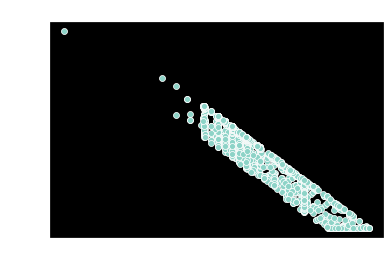

In [165]:
import seaborn as sns
%matplotlib inline

sns.scatterplot(x=demolished_buildings['yearbuilt'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Year Built');

sns.set(rc={'figure.figsize':(11,8)}, style='ticks')
plt.style.use('dark_background')

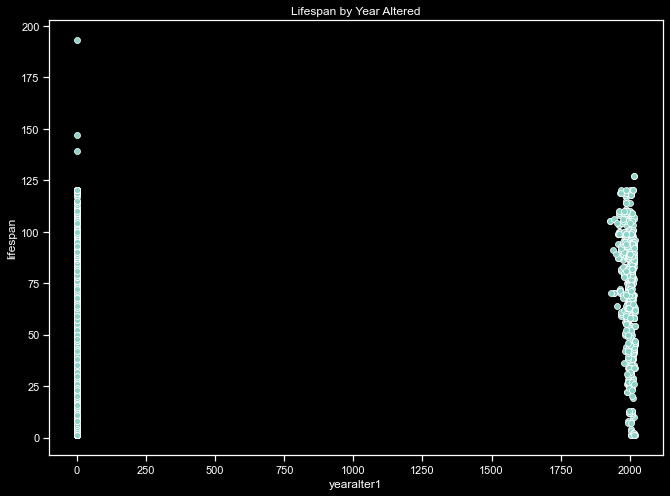

In [90]:
sns.scatterplot(x=demolished_buildings['yearalter1'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Year Altered');

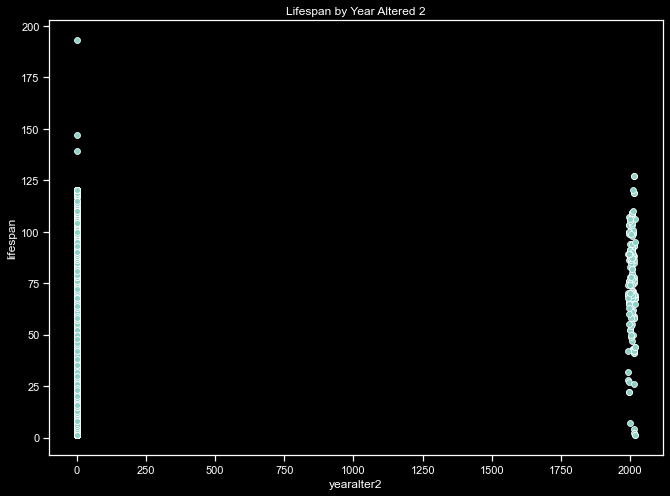

In [91]:
sns.scatterplot(x=demolished_buildings['yearalter2'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Year Altered 2');

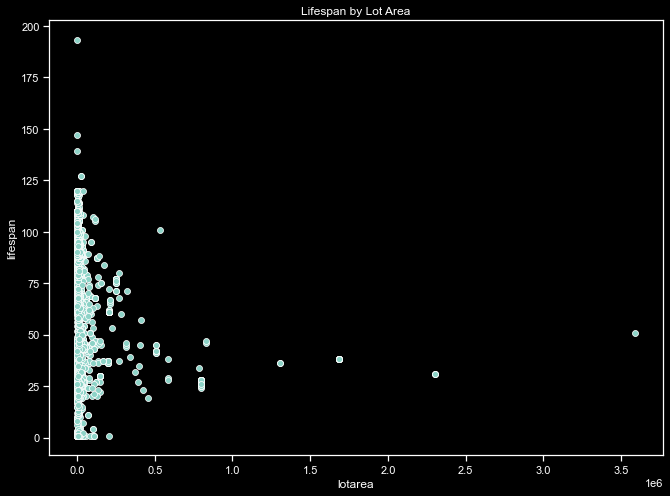

In [92]:
sns.scatterplot(x=demolished_buildings['lotarea'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Lot Area');

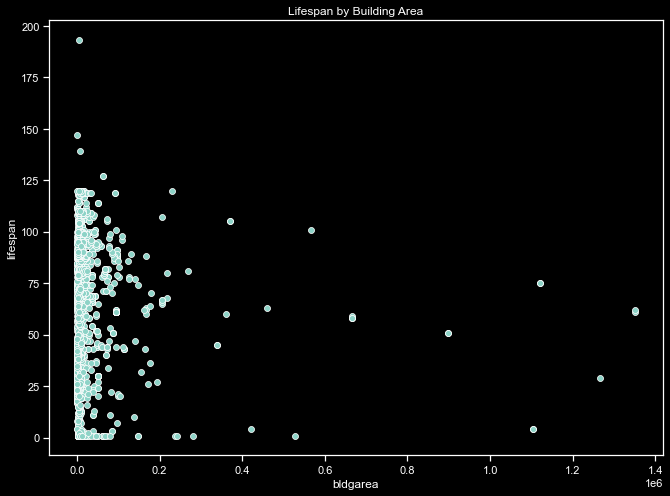

In [93]:
sns.scatterplot(x=demolished_buildings['bldgarea'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Building Area');

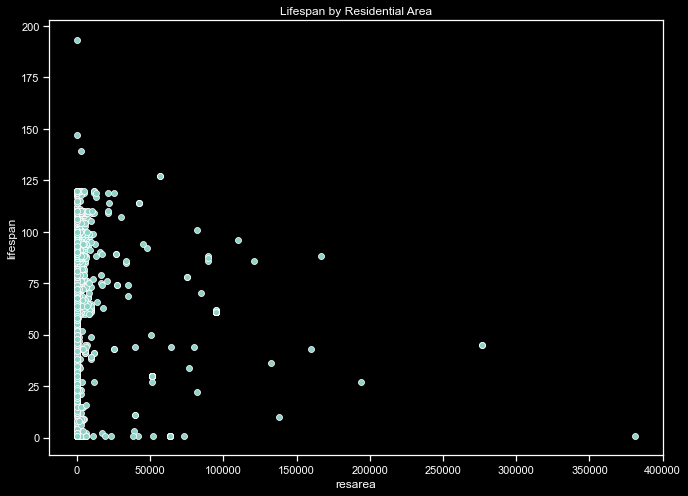

In [94]:
sns.scatterplot(x=demolished_buildings['resarea'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Residential Area');

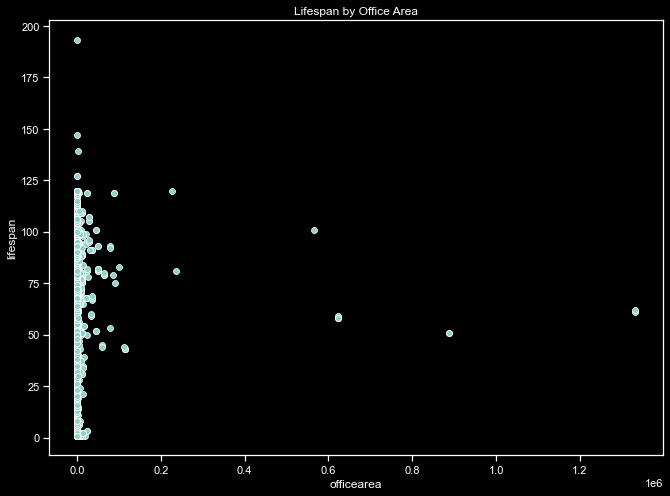

In [95]:
sns.scatterplot(x=demolished_buildings['officearea'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Office Area');

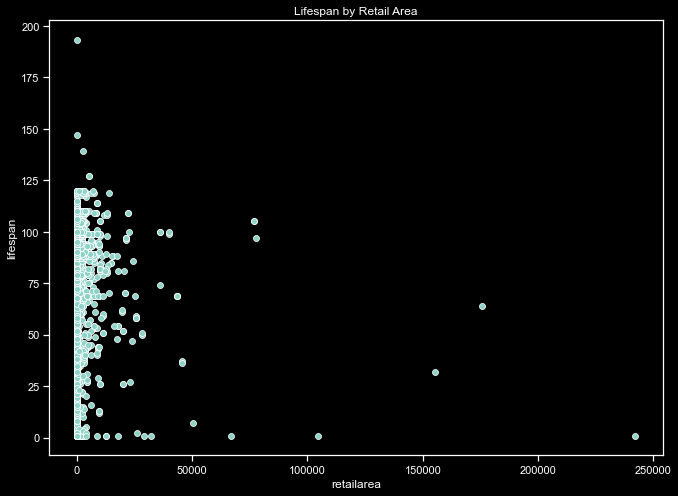

In [96]:
sns.scatterplot(x=demolished_buildings['retailarea'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Retail Area');

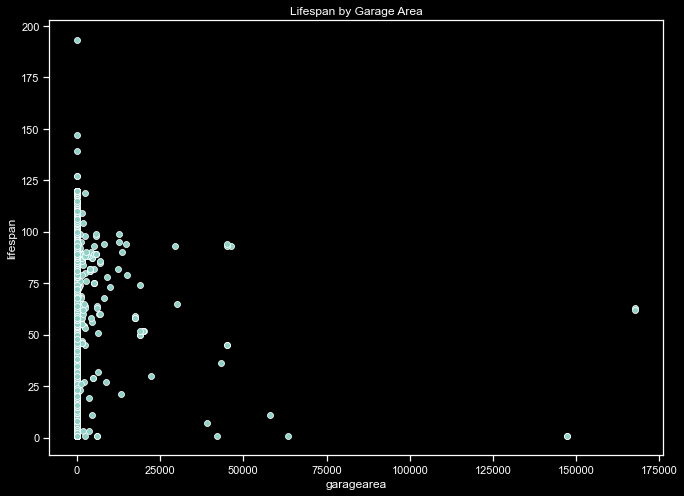

In [97]:
sns.scatterplot(x=demolished_buildings['garagearea'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Garage Area');

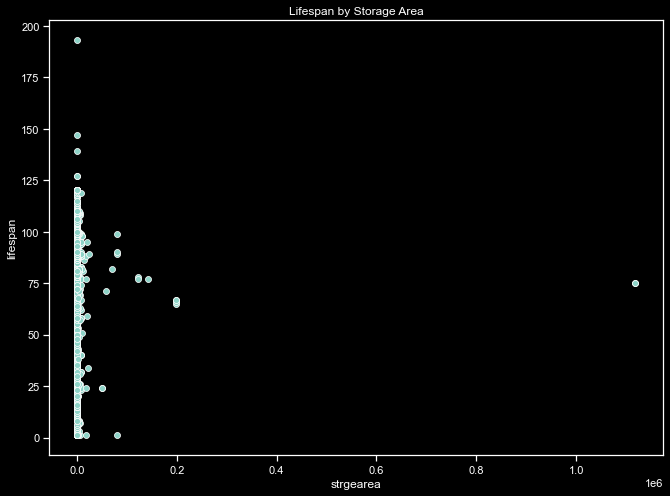

In [98]:
sns.scatterplot(x=demolished_buildings['strgearea'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Storage Area');

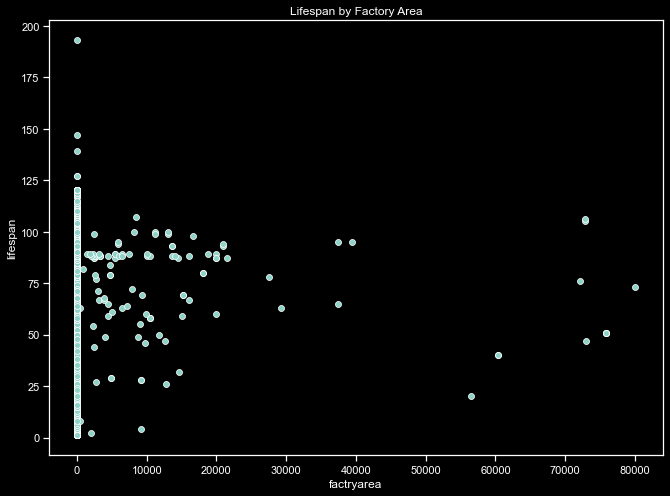

In [99]:
sns.scatterplot(x=demolished_buildings['factryarea'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Factory Area');

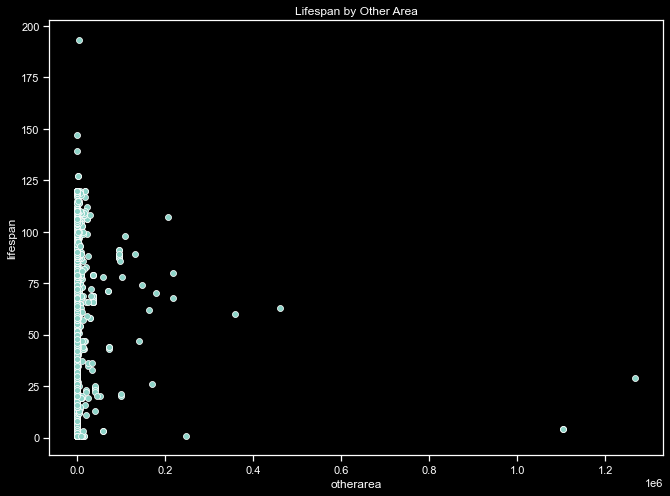

In [100]:
sns.scatterplot(x=demolished_buildings['otherarea'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Other Area');

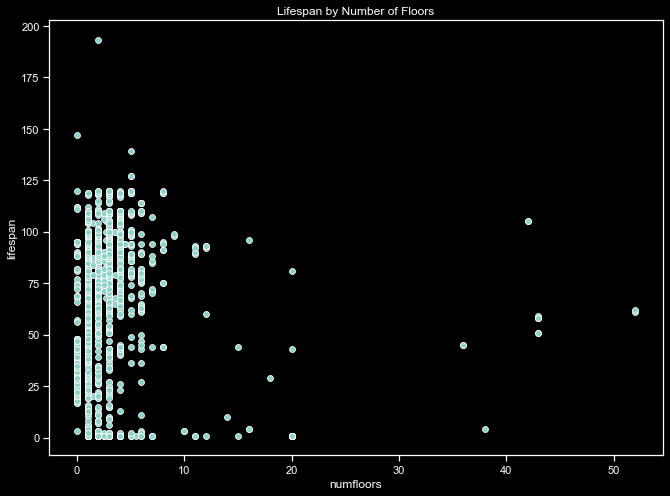

In [101]:
sns.scatterplot(x=demolished_buildings['numfloors'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Number of Floors');

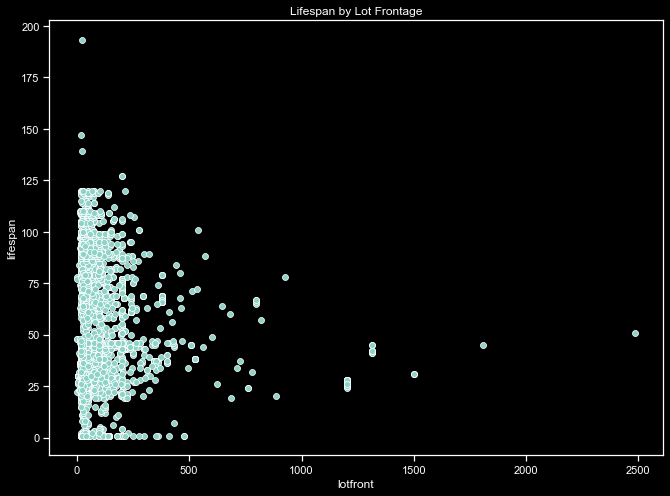

In [102]:
sns.scatterplot(x=demolished_buildings['lotfront'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Lot Frontage');

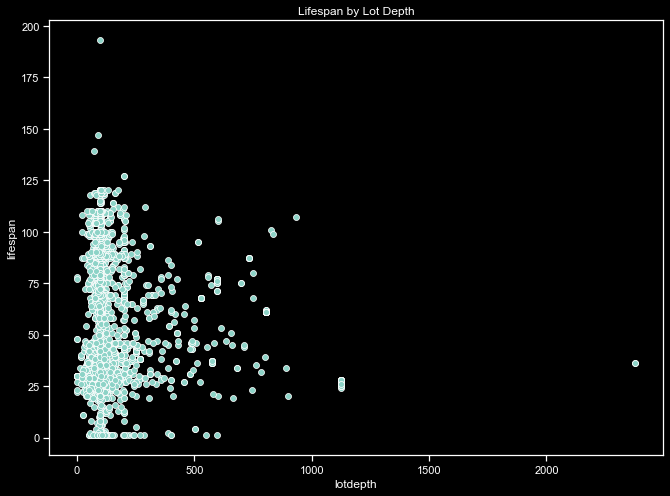

In [103]:
sns.scatterplot(x=demolished_buildings['lotdepth'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Lot Depth');

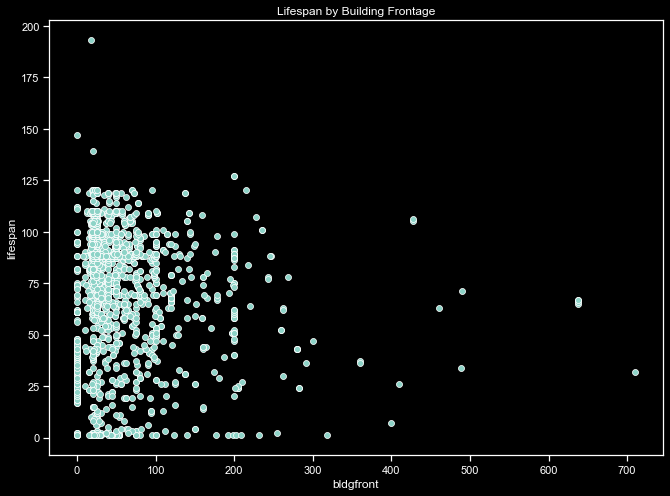

In [104]:
sns.scatterplot(x=demolished_buildings['bldgfront'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Building Frontage');

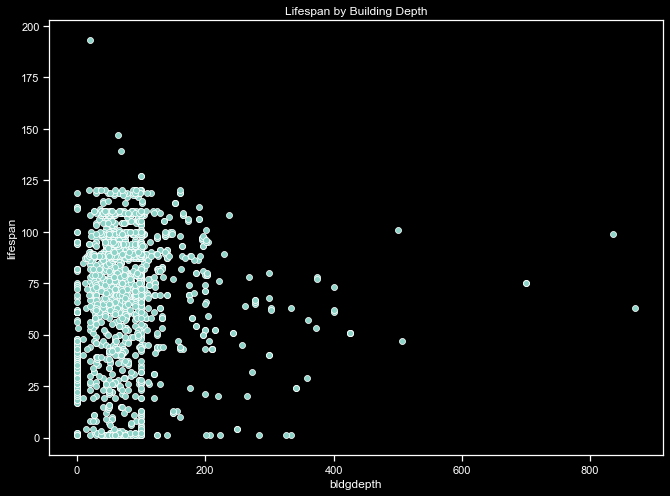

In [105]:
sns.scatterplot(x=demolished_buildings['bldgdepth'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Building Depth');

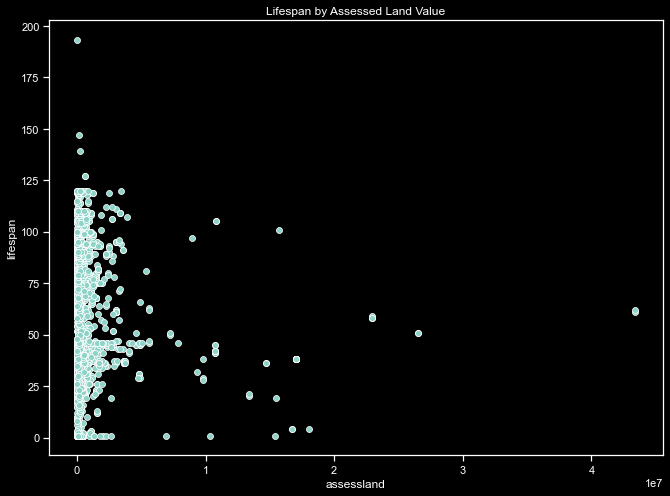

In [106]:
sns.scatterplot(x=demolished_buildings['assessland'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Assessed Land Value');

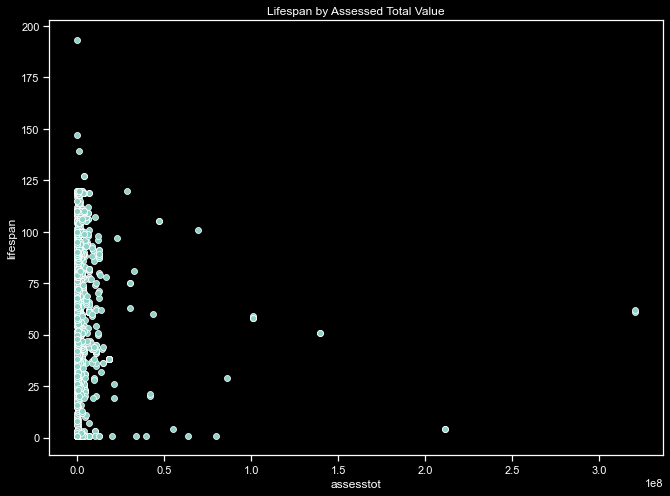

In [107]:
sns.scatterplot(x=demolished_buildings['assesstot'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Assessed Total Value');

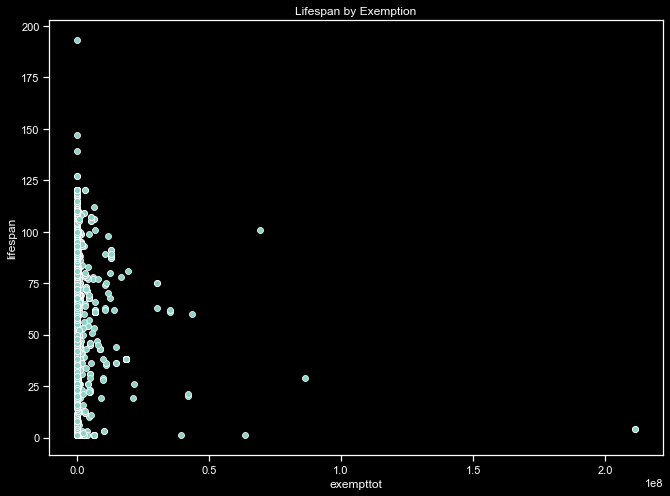

In [108]:
sns.scatterplot(x=demolished_buildings['exempttot'], 
                y=demolished_buildings['lifespan']).set_title('Lifespan by Exemption');

__Comments__
- Based on the plots above, yearalter1 and yearalter2 should be a categorical variable
- There does not seem to be a linear relationship between any categorical variable and the target except for year built.
- Linear regression is not a recommended modeling method.

In [109]:
#Checking correlation

demolished_buildings.corr()

,cd,schooldist,council,policeprct,healtharea,zonedist4,spdist3,easements,lotarea,bldgarea,...,builtfar,residfar,commfar,facilfar,borocode,firm07_flag,pfirm15_flag,Issuance Year,existbldg,lifespan
cd,1.000000,0.943974,0.757680,0.964995,-0.355841,NaN,NaN,0.036613,0.139136,-0.105132,...,-0.264423,-0.574748,-0.387090,-0.628155,0.998714,0.069647,0.076910,-0.253987,NaN,-0.272575
schooldist,0.943974,1.000000,0.704967,0.908437,-0.273094,NaN,NaN,0.032610,0.122842,-0.102485,...,-0.263544,-0.564253,-0.394182,-0.588943,0.939139,0.058978,0.074291,-0.253669,NaN,-0.267278
council,0.757680,0.704967,1.000000,0.680739,0.030228,NaN,NaN,-0.001360,0.106182,-0.078409,...,-0.251156,-0.528869,-0.395869,-0.578245,0.751395,0.106354,0.131993,-0.302921,NaN,-0.248668
policeprct,0.964995,0.908437,0.680739,1.000000,-0.512108,NaN,NaN,0.032657,0.131031,-0.107106,...,-0.249051,-0.533035,-0.380843,-0.593140,0.967982,0.032977,0.021210,-0.223284,NaN,-0.248988
healtharea,-0.355841,-0.273094,0.030228,-0.512108,1.000000,NaN,NaN,-0.051847,-0.090153,0.069091,...,0.077168,0.107926,0.124629,0.164582,-0.373204,0.077006,0.142527,-0.023090,NaN,0.049262
zonedist4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spdist3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
easements,0.036613,0.032610,-0.001360,0.032657,-0.051847,NaN,NaN,1.000000,0.486152,0.121355,...,0.030209,-0.041716,0.004441,-0.046314,0.038509,0.089242,0.089921,0.004272,NaN,-0.009255
lotarea,0.139136,0.122842,0.106182,0.131031,-0.090153,NaN,NaN,0.486152,1.000000,0.062921,...,-0.047580,-0.114450,-0.041736,-0.143015,0.140941,0.325899,0.287294,-0.049403,NaN,-0.047396
bldgarea,-0.105132,-0.102485,-0.078409,-0.107106,0.069091,NaN,NaN,0.121355,0.062921,1.000000,...,0.541274,0.123459,0.211937,0.161948,-0.105272,0.056247,0.045190,-0.008893,NaN,0.052541


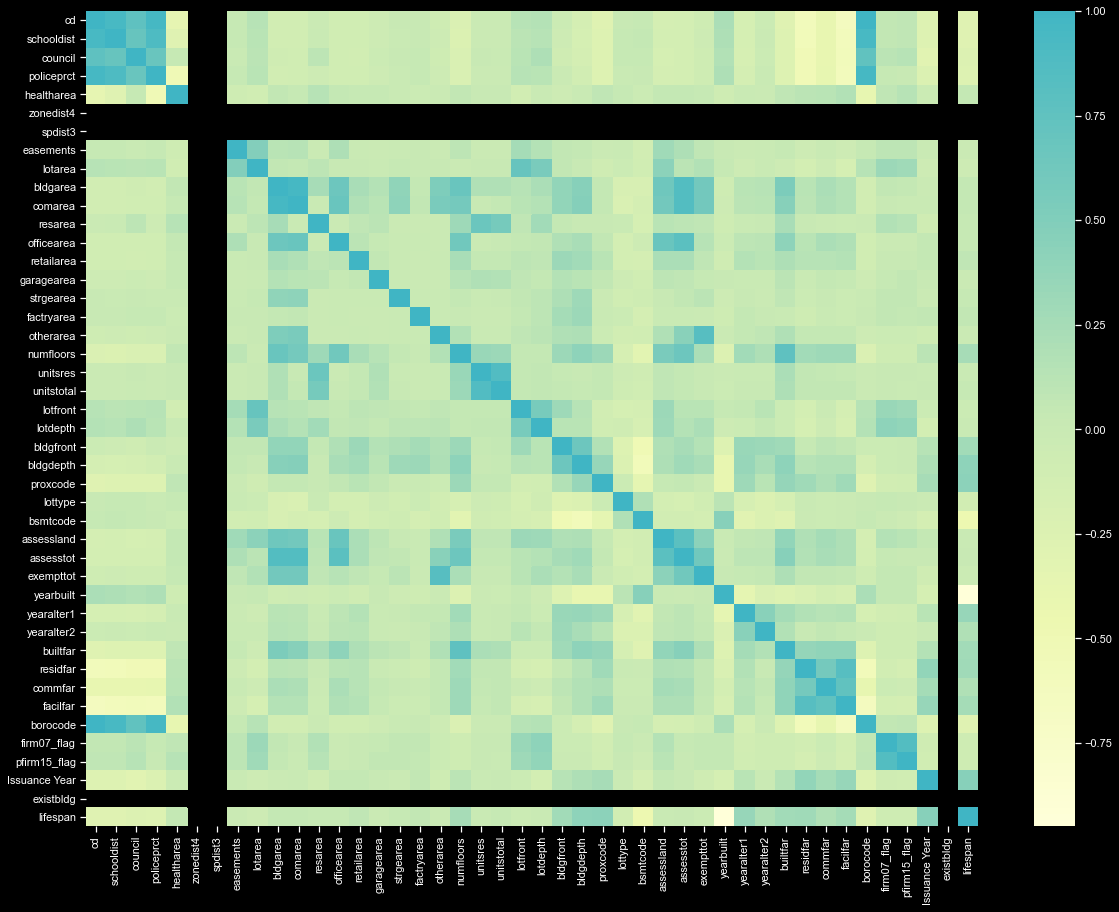

In [110]:
# correlation heat map
plt.subplots(figsize=(20,15))
sns.heatmap(demolished_buildings.corr(), center=1, cmap='YlGnBu');

In [111]:
demolished_buildings['overlay2'].value_counts()

0    3543
Name: overlay2, dtype: int64

In [112]:
demolished_buildings['existbldg'].value_counts()

0    3543
Name: existbldg, dtype: int64

__Heat Map Comments__\
The following variables will be removed because of multicolinearity:
- borocode
- cd
- schooldist
- council
- assessland
- exempttot
- unitsres
- comarea
- resarea
- officearea
- residfar
- commfar
- facilfar
- pfirm15_flag
- firm07_flag
- lotfront
- unitstotal
- bldgarea
- builtfar
- numfloors
- yearalter1
- yearalter2
- garagearea
- easements
- bldgdepth
- lotdepth
- retailarea
- otherarea

The following variables will be removed because there is no data:
- zonedist4
- spdist3
- overlay2

The following variables will be removed because it was used only to filter data, and is not needed for prediction:
- existbldg
- Issuance Year

#### Removing Multicolinear Features

In [113]:
demolished_buildings = demolished_buildings.drop(axis=1, columns=['borocode', 'cd', 'schooldist', 'council', 'assessland', 'exempttot', 
                                    'unitsres', 'comarea', 'resarea', 'officearea', 'residfar', 'commfar', 'facilfar', 
                                    'pfirm15_flag', 'firm07_flag', 'spdist3', 'lotfront', 'unitstotal', 'bldgarea', 'builtfar',
                                    'numfloors', 'yearalter1', 'yearalter2', 'garagearea', 'easements', 'bldgdepth', 
                                    'lotdepth','zonedist4', 'spdist3', 'overlay2', 'existbldg', 'Issuance Year', 
                                    'retailarea', 'otherarea'])

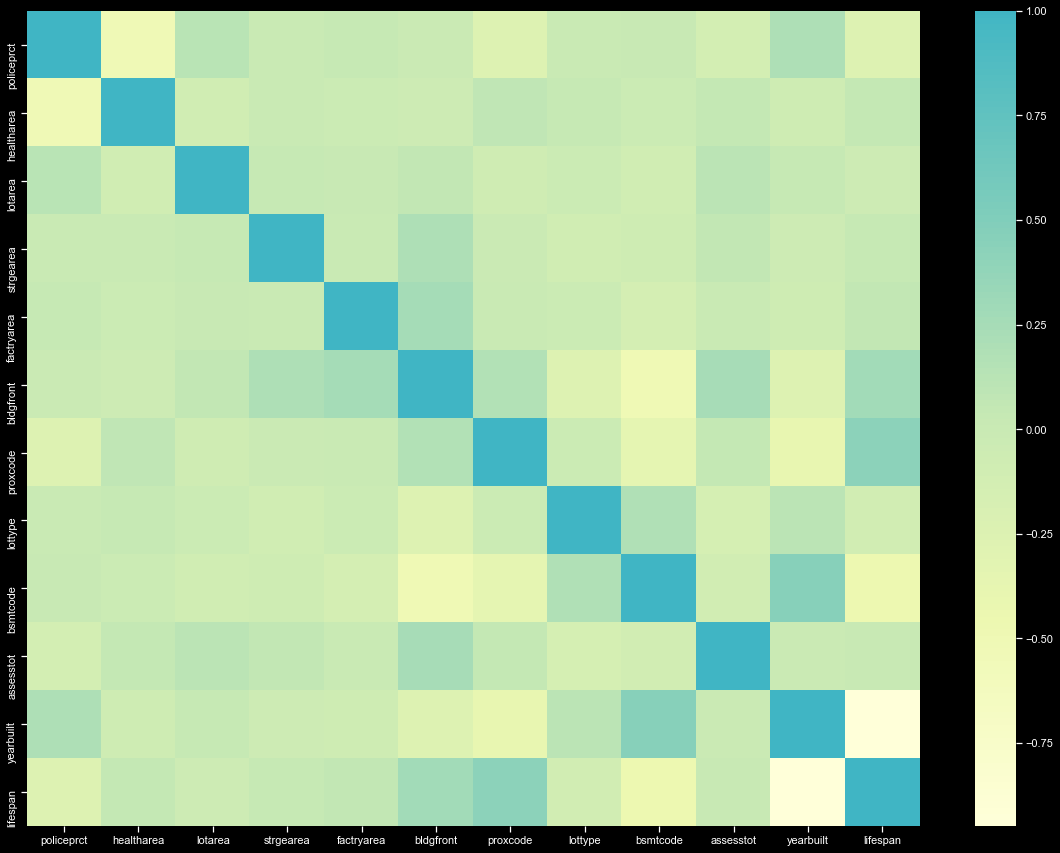

In [114]:
# look at correlation heat map again to see if it improved
plt.subplots(figsize=(20,15))
sns.heatmap(demolished_buildings.corr(), center=1, cmap='YlGnBu');

__Heat Map Comments__

Remove bsmtcode, proxcode for multicolinearity.

Remove edesignum because it is not relevant.

Remove Issuance date because it was only needed to make lifespan column.

Remove landuse because it is redundant with bldgclass (see Data Dictionary.)


In [115]:
demolished_buildings = demolished_buildings.drop(axis=1, columns=['bsmtcode', 
                                                                  'proxcode', 
                                                                  'edesignum',
                                                                 'Issuance Date',
                                                                 'landuse'])

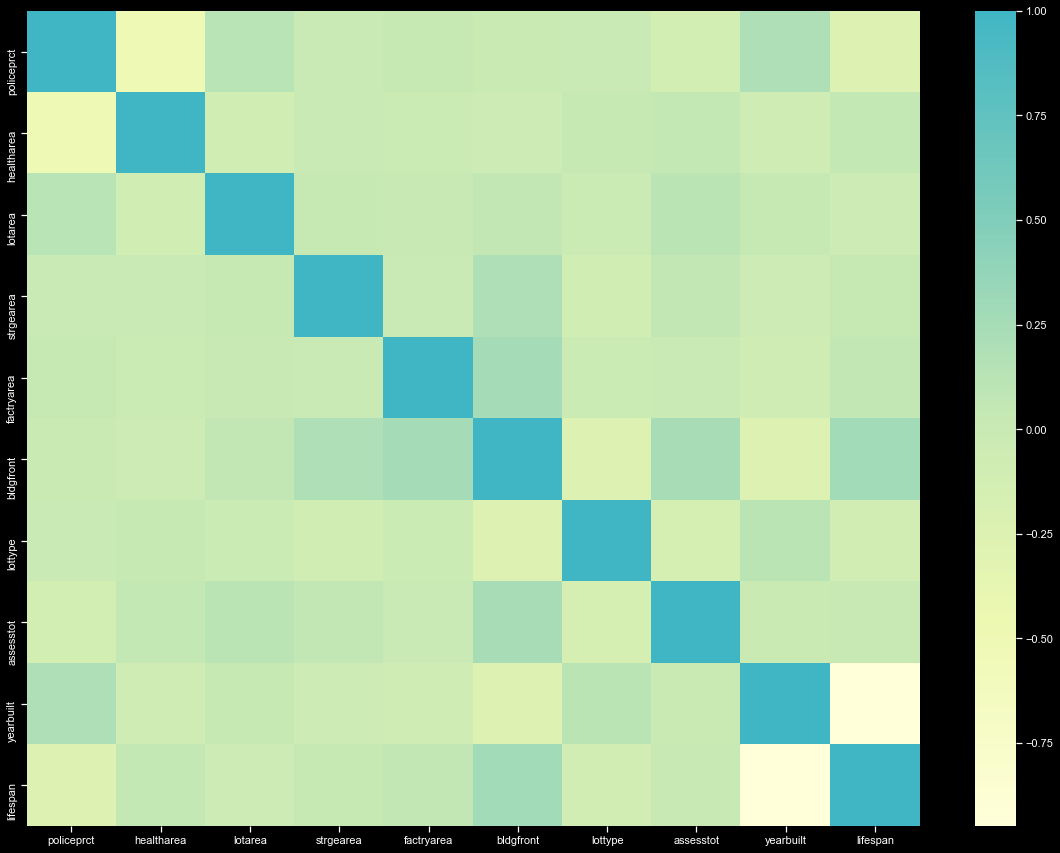

In [116]:
# look at correlation heat map again to see if it improved
plt.subplots(figsize=(20,15))
sns.heatmap(demolished_buildings.corr(), center=1, cmap='YlGnBu');

In [117]:
#check the current number of features
len(demolished_buildings.columns)

24

In [118]:
demolished_buildings.columns

Index(['policeprct', 'healtharea', 'zonedist1', 'zonedist2', 'zonedist3',
       'overlay1', 'spdist1', 'spdist2', 'ltdheight', 'splitzone', 'bldgclass',
       'ownertype', 'lotarea', 'strgearea', 'factryarea', 'bldgfront', 'ext',
       'irrlotcode', 'lottype', 'assesstot', 'yearbuilt', 'histdist',
       'landmark', 'lifespan'],
      dtype='object')

In [119]:
#pickle and copy

with open('data/pickles/demolished_buildings.pickle', 'wb') as f:
    pickle.dump(demolished_buildings, f)

demolished_buildings = demolished_buildings.copy()

## Explanation of Features

Feature descriptions come from the PLUTO data dictionary.

- policeprct - The police precinct in which the tax lot is located.

- healtharea - The health area in which the tax lot is located. Health areas were originally created in the 1920s for the purpose of reporting and  statistical analysis of public health data. They were based on census tracts and created to be areas of equal population.


- zonedist1 - The zoning district classification of the tax lot. Under the Zoning Resolution, the map of New York City is generally apportioned into three basic zoning district categories: Residence (R), Commercial (C) and Manufacturing (M), which are further divided into a range of individual zoning districts, denoted by different number and letter combinations. In general, the higher the number immediately following the first letter (R, C or M), the higher the density or intensity of land use permitted.  

- zonedist2 - If the tax lot is divided by zoning boundary lines, ZONING DISTRICT 2 represents the zoning classification occupying the second greatest percentage of the tax lot's area. Only zoning districts that cover at least 10% of a tax lot’s area are included. 

- zonedist3 - If the tax lot is divided by zoning boundary lines, ZONING DISTRICT 3 represents the zoning classification occupying the third greatest percentage of the tax lot's area. Only zoning districts that cover at least 10% of a tax lot’s area are included. 

- overlay1 - The commercial overlay assigned to the tax lot. A commercial overlay is a C1 or C2 zoning district mapped within residential zoning districts to serve local retail needs (grocery stores, dry cleaners, restaurants, for example). 

- spdist1 - The special purpose district assigned to the tax lot. The regulations for special purpose districts are designed to supplement and modify the underlying zoning in order to respond to distinctive neighborhoods with particular issues and goals. Only special purpose districts that cover at least 10% of a tax lot’s area are included. 

- spdist2 - The special purpose district assigned to the tax lot. The regulations for special purpose districts are designed to supplement and modify the underlying zoning in order to respond to distinctive neighborhoods with particular issues and goals. Only special purpose districts that cover at least 10% of a tax lot’s area are included.  

- ltdheight - The limited height district assigned to the tax lot. A limited height district is superimposed on an area designated as an historic district by the Landmarks Preservation Commission. 

- splitzone - A code indicating whether the tax lot is split between multiple zoning features. The split boundary indicator is equal to “Y” if the tax lot has a value for ZONING DISTRICT 2, COMMERCIAL OVERLAY 2, or SPECIAL DISTRICT BOUNDARY 2.  

- bldgclass - A code describing the major use of structures on the tax lot. BUILDING CLASS is taken from Property Tax System (PTS) without modification. 

&emsp; 01 One & Two Family Buildings \
&emsp; 02 Multi-Family Walk-Up Buildings \
&emsp; 03 Multi-Family Elevator Buildings \
&emsp; 04 Mixed Residential & Commercial Buildings\
&emsp; 05 Commercial & Office Buildings\
&emsp; 06 Industrial & Manufacturing\
&emsp; 07 Transportation & Utility \
&emsp; 08 Public Facilities & Institutions \
&emsp; 09 Open Space & Outdoor Recreation \
&emsp; 10 Parking Facilities \
&emsp; 11 Vacant Land 

- ownertype - A code indicating type of ownership for the tax lot. 

&emsp; C City ownership \
&emsp; M Mixed city & private ownership \
&emsp; O Other – owned by either a public authority or the state or federal government \
&emsp; P Private ownership \
&emsp; X Fully tax-exempt property that may be owned by the city, state, or federal government; a public authority; or a private institution Unknown (usually private ownership) \

- lotarea - Total area of the tax lot, expressed in square feet rounded to the nearest integer. 

- strgearea - An estimate of the exterior dimensions of the portion of the structure(s) allocated for storage or loft purposes.   

- factryarea - An estimate of the exterior dimensions of the portion of the structure(s) allocated for factory, warehouse or loft use. 

- bldgfront - The building’s frontage along the street measured in feet.

- ext - A code identifying whether there is an extension on the lot or a garage other than the primary structure.  

&emsp; E Extension \
&emsp; G Garage \
&emsp; EG Extension and garage \
&emsp; N None

- irrlotcode - A code indicating whether the tax lot is irregularly shaped. 

&emsp; Y Yes, an irregularly shaped lot \
&emsp; N No, not an irregularly shaped lot

- lottype - A code indicating the location of the tax lot in relationship to another tax lot and/or the water. 

- assesstot - The assessed total value for the tax lot. 

- yearbuilt - The date of original construction.

- histdist - The name of the Historic District that the tax lot is within. Historic Districts are designated by the New York City Landmarks Preservation Commission.  

- landmark - This value indicates whether the lot contains an individual landmark building, an interior landmark building, or both.  

- lifespan - the total time the building was in service from date of construction to date of demolition, in years.

## Feature Selection

__Comments__
- There are too many columns to one-hot encode without creating an extremely large dataframe, so use a feature selection methods will be explored. 
- Selecting the subset of 24 features that seem likely to have a relationship to the 
predictor variable, using business understanding.
- The first batch of models will be done using only the continuous variables. 
- The second batch of models will be done using a larger set of variables.

## Feature Engineering

Taking a deeper look at each of the 24 columns to decide if features need to be binned or engineered in any way. The continuous columns 'lotarea', 'strgearea', 'factryarea', 'bldgfront', 'assesstot' can stay as-is.

In [120]:
demolished_buildings.columns

Index(['policeprct', 'healtharea', 'zonedist1', 'zonedist2', 'zonedist3',
       'overlay1', 'spdist1', 'spdist2', 'ltdheight', 'splitzone', 'bldgclass',
       'ownertype', 'lotarea', 'strgearea', 'factryarea', 'bldgfront', 'ext',
       'irrlotcode', 'lottype', 'assesstot', 'yearbuilt', 'histdist',
       'landmark', 'lifespan'],
      dtype='object')

In [122]:
demolished_buildings.policeprct.value_counts()

90.0     148
114.0    148
75.0     125
61.0     117
108.0    101
109.0    100
94.0      98
120.0     91
79.0      90
18.0      85
123.0     84
19.0      80
122.0     77
103.0     69
84.0      67
83.0      66
66.0      65
104.0     63
81.0      62
73.0      62
121.0     62
72.0      58
25.0      56
76.0      49
47.0      48
40.0      48
60.0      48
10.0      47
70.0      47
88.0      46
105.0     46
102.0     46
106.0     46
62.0      42
77.0      42
1.0       42
42.0      41
110.0     40
113.0     37
48.0      36
14.0      36
100.0     34
101.0     32
9.0       31
41.0      31
115.0     30
45.0      29
28.0      29
32.0      29
13.0      29
67.0      27
17.0      27
111.0     25
7.0       25
5.0       24
63.0      24
78.0      23
68.0      23
52.0      22
43.0      22
23.0      22
44.0      22
26.0      22
49.0      21
107.0     20
112.0     19
69.0      19
6.0       17
20.0      16
46.0      16
34.0      16
71.0      16
24.0      15
50.0      13
30.0      10
33.0       2
Name: police

__Comments__

There are too many values in the policeprct feature to one-hot encode, it will result in a large dataframe with sparse data.

In [141]:
#checking the target variable to make sure all values are positive.
demolished_buildings.lifespan.value_counts()

46     152
45     137
34     132
35     113
36      97
33      95
1       88
88      85
44      84
26      84
27      77
43      77
28      71
31      68
89      66
30      63
32      63
24      60
21      59
42      58
29      56
61      56
99      56
41      51
23      50
22      50
109     49
37      48
38      47
25      45
87      44
20      44
69      41
40      41
39      36
68      35
94      33
100     31
79      29
82      29
19      27
76      26
71      26
93      26
75      26
110     25
66      25
119     24
77      24
65      24
74      23
78      22
72      21
58      21
95      20
90      20
105     20
86      19
98      19
67      19
108     18
81      17
104     17
47      17
73      16
60      16
63      16
80      15
97      15
120     15
64      15
62      15
91      15
85      15
2       15
54      11
70      11
51      11
52      10
83      10
59      10
50       9
84       9
18       9
53       9
3        8
92       8
49       8
8        7
101      7
96       7

In [123]:
demolished_buildings.healtharea.value_counts()

800.0     118
300.0      79
100.0      78
1200.0     78
4800.0     76
1410.0     73
710.0      71
3800.0     68
1500.0     67
400.0      64
910.0      61
500.0      61
3700.0     58
720.0      52
1100.0     47
9120.0     47
5700.0     45
3600.0     45
3300.0     44
3400.0     43
700.0      43
5200.0     43
200.0      42
1700.0     41
3100.0     40
2600.0     40
4300.0     40
5500.0     39
2710.0     35
900.0      34
600.0      33
6800.0     32
1310.0     30
1600.0     30
4100.0     29
4700.0     29
1900.0     29
2500.0     28
3210.0     28
920.0      28
8510.0     28
2800.0     27
1300.0     27
2400.0     27
7700.0     27
9020.0     26
210.0      26
4400.0     26
7400.0     25
2100.0     25
3500.0     25
3000.0     24
6200.0     23
3820.0     23
6700.0     22
6420.0     22
6100.0     21
2300.0     21
1000.0     21
3510.0     21
8620.0     20
610.0      20
4200.0     20
5000.0     19
3532.0     19
5900.0     19
2000.0     19
3900.0     18
620.0      18
2900.0     17
2810.0     16
4000.0

__Comments__

There are too many values in the healtharea feature to one-hot encode, it will result in a large dataframe with sparse data.

In [125]:
demolished_buildings.zonedist1.value_counts()

R6           353
M1-1         222
R5           185
R6A          167
R7A          164
R6B          147
R3-2         138
M3-1         112
M1-2          90
R3-1          83
R4            80
R7-1          73
R7-2          65
R3X           65
R5B           63
R3A           60
R4-1          59
R8            50
R8A           47
C6-4          46
M2-1          45
M1-4          44
C4-2          43
R2            43
M1-2/R6A      40
C5-3          38
C8-1          34
R5D           32
R7X           30
C6-3          30
C1-9          30
R8B           30
M1-6          29
M1-5          28
0             27
PARK          26
C4-3          26
R1-2          24
R4A           23
R7D           22
C8-2          21
C5-5          21
C6-4.5        20
C4-4          20
M1-3          18
C6-2          18
C5-2.5        18
C2-8A         15
R7B           14
C6-9          14
C4-5X         14
M1-4/R8A      13
C6-1          13
C4-4L         13
C4-4D         12
C4-4A         12
C8-3          12
M1-5/R7-3     12
M1-2/R5D      

In [126]:
demolished_buildings.zonedist2.value_counts()

0           3333
R8            26
R6B           19
R5            13
M1-1          11
C6-2          10
R7A            8
R2X            8
R5B            7
R6A            7
C4-4D          6
R7B            6
R3-2           5
R4             5
C4-2           5
R4-1           5
C6-4           4
R7-1           4
M1-5           4
R7-2           4
R1-2           4
R5D            4
R9             3
M1-2/R6B       3
R6             3
C1-9           3
C6-2A          3
C4-4A          2
C4-7           2
C8-1           2
R3-1           2
R10A           2
R3X            2
C5-1           2
C6-3A          2
R3A            2
R4A            2
C5-4           1
M1-2/R5B       1
R1-1           1
C6-4X          1
M3-1           1
R7D            1
R8B            1
C6-6.5         1
M1-2           1
C6-4.5         1
Name: zonedist2, dtype: int64

In [127]:
demolished_buildings.zonedist3.value_counts()

0       3541
C8-3       2
Name: zonedist3, dtype: int64

In [128]:
demolished_buildings.overlay1.value_counts()

0       2655
C2-4     311
C2-3     149
C1-3      94
C2-2      85
C1-4      82
C1-2      59
C1-1      28
C1-5      27
C2-1      27
C2-5      26
Name: overlay1, dtype: int64

In [129]:
demolished_buildings.spdist1.value_counts()

0             2738
SRD             97
MiD             89
OP              62
DB              53
LIC             48
MX-8            40
DJ              33
HY              25
LM              25
HS              16
CR              16
WCh             15
HP              15
TA              14
SG              13
CI              12
EHC             12
EC-5            12
BR              10
HSQ             10
MX-13            9
125th/TA         8
125th            8
MP               8
MX-1             8
NA-1             8
EC-3             8
DFR              7
CO               7
EC-4             7
MMU              7
MX-7             7
MX-16            7
L                7
FH               6
SB               6
MX-2             5
CL               5
MX-16/EC-5       5
MX-10            5
C                5
J                4
MX-15            4
CD               3
HRW              3
EHC/TA           3
WP               2
US               2
NA-2             2
CP               2
MX-14            2
EC-1        

In [130]:
demolished_buildings.spdist2.value_counts()

0        3542
125th       1
Name: spdist2, dtype: int64

In [131]:
demolished_buildings.ltdheight.value_counts()

0        3541
LH-1A       1
LH-1        1
Name: ltdheight, dtype: int64

In [132]:
demolished_buildings.splitzone.value_counts()

N    3305
Y     211
0      27
Name: splitzone, dtype: int64

In [133]:
demolished_buildings.bldgclass.value_counts()

V1    745
V0    514
G7    351
Z9    157
K1    143
C0    110
M1     89
C1     84
K4     76
E1     73
S2     60
K2     49
E9     49
O5     48
G1     45
G6     40
W9     37
C7     36
G2     34
F5     34
D1     28
O2     28
C3     25
S9     25
W1     24
Q1     23
S1     22
P7     22
K5     21
C2     20
O7     20
S3     19
F4     19
G0     17
V3     17
D7     17
R3     16
O6     16
O8     15
K9     14
S5     14
S4     12
G9     11
F9     11
N2     11
M9     10
K7     10
Q2      9
O4      9
O1      9
W2      8
C4      8
L8      8
G4      8
G5      8
M3      8
P9      7
D6      7
E7      7
G8      7
D9      7
N9      6
T9      6
I5      6
I1      6
F1      6
E2      6
K6      5
U9      5
G3      5
P5      4
H3      4
I6      4
Y6      4
GU      4
V9      4
C6      4
Z8      4
U2      3
O9      3
D3      3
D5      3
J6      3
Q6      3
O3      3
W8      3
I9      3
C5      3
T2      2
Z3      2
P3      2
Z7      2
RW      2
Z4      2
H1      2
H2      2
P6      2
L2      2
Q9      2
U0      2


In [134]:
demolished_buildings.ownertype.value_counts()

P    2987
X     337
C     215
M       4
Name: ownertype, dtype: int64

In [135]:
demolished_buildings.ext.value_counts()

0     1836
N     1370
E      231
G       78
EG      28
Name: ext, dtype: int64

In [136]:
demolished_buildings.irrlotcode.value_counts()

N    2163
Y    1380
Name: irrlotcode, dtype: int64

In [137]:
demolished_buildings.lottype.value_counts()

5.0    2483
3.0     879
4.0      84
1.0      48
6.0      21
2.0      14
0.0      11
8.0       2
7.0       1
Name: lottype, dtype: int64

In [138]:
demolished_buildings.yearbuilt.value_counts()

1972    1838
1931     209
1920     159
1930     144
1910     130
1925      81
1900      60
1938      59
1940      52
1915      38
1929      36
1950      35
1960      28
1928      19
1901      18
1965      18
1926      17
1955      16
2007      16
2004      14
1980      14
1932      14
1924      13
2000      13
1958      13
2006      12
1969      12
1905      12
1994      12
1978      11
1970      11
2005      11
1922      10
1921      10
1935      10
1968      10
1993      10
1963      10
1995      10
1899       9
1948       9
1961       9
1990       9
1945       9
1957       8
1953       8
1956       8
1974       8
1913       8
1988       8
2003       8
1927       7
1997       7
1975       7
1966       7
1914       7
1954       6
1964       6
1949       6
1909       6
2001       6
1999       6
1918       5
1946       5
1967       5
1933       5
1992       5
1959       5
1951       5
2018       4
1991       4
1989       4
1976       4
1943       4
1947       4
2015       4
1996       4

In [139]:
demolished_buildings.histdist.value_counts()

0                                                        3522
Greenwich Village Historic District                         3
Sullivan-Thompson Historic District                         3
Morningside Heights Historic District                       2
East Village / Lower East Side Historic District            2
Borough Hall Skyscraper Historic District                   2
SoHo-Cast Iron Historic District Extension                  2
Fort Greene Historic District                               1
Upper West Side / Central Park West Historic District       1
Prospect Heights Historic District                          1
Upper East Side Historic District                           1
South Street Seaport Historic District                      1
DUMBO Historic District                                     1
Ladies' Mile Historic District                              1
Name: histdist, dtype: int64

In [140]:
demolished_buildings.landmark.value_counts()

0                      3524
INDIVIDUAL LANDMARK      19
Name: landmark, dtype: int64

## Feature Engineering

__Comments__

binning: zonedist1, zonedist2, bin into residential, commercial, manufacturing, special purpose.

historic district - bin into historic(1) or not(0)


In [170]:
demolished_buildings.zonedist1.str.startswith('R')

82       False
106       True
134      False
185      False
208      False
         ...  
37680     True
37681    False
37682    False
37684    False
37685    False
Name: zonedist1, Length: 3543, dtype: object

In [173]:
#make a column for zonedist1 residential, 1 means it is in a residential zone, 0 means it's not
demolished_buildings['zonedist1_R'] = np.where(demolished_buildings.zonedist1.str.startswith('R'), 1, 0)

#make a column for zonedist1 commercial
demolished_buildings['zonedist1_C'] = np.where(demolished_buildings.zonedist1.str.startswith('C'), 1, 0)

#make a column for zonedist1 manufacturing
demolished_buildings['zonedist1_M'] = np.where(demolished_buildings.zonedist1.str.startswith('M'), 1, 0)

In [175]:
#checking to see if it worked
demolished_buildings[['zonedist1', 'zonedist1_R']]

,zonedist1,zonedist1_R
82,C1-8A,0
106,R5D,1
134,C4-4L,0
185,C8-2,0
208,M1-2/R6A,0
...,...,...
37680,R7-2,1
37681,M1-2,0
37682,M1-2,0
37684,C6-3,0


In [ ]:
#make a column for zonedist1 special purpose
#startswith EC for "Enhanced Commercial District", CR for "Coastal Risk District", MX for "Special Mixed Use District"

In [166]:
demolished_buildings.zonedist1.value_counts()

R6           353
M1-1         222
R5           185
R6A          167
R7A          164
R6B          147
R3-2         138
M3-1         112
M1-2          90
R3-1          83
R4            80
R7-1          73
R7-2          65
R3X           65
R5B           63
R3A           60
R4-1          59
R8            50
R8A           47
C6-4          46
M2-1          45
M1-4          44
C4-2          43
R2            43
M1-2/R6A      40
C5-3          38
C8-1          34
R5D           32
R7X           30
C6-3          30
C1-9          30
R8B           30
M1-6          29
M1-5          28
0             27
PARK          26
C4-3          26
R1-2          24
R4A           23
R7D           22
C8-2          21
C5-5          21
C6-4.5        20
C4-4          20
M1-3          18
C6-2          18
C5-2.5        18
C2-8A         15
R7B           14
C6-9          14
C4-5X         14
M1-4/R8A      13
C6-1          13
C4-4L         13
C4-4D         12
C4-4A         12
C8-3          12
M1-5/R7-3     12
M1-2/R5D      

## One Hot Encoding